In [142]:
import numpy as np
import pandas as pd

In [143]:
resto = pd.read_csv('restaurant_menu_optimization_data.csv')
resto

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...,...
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


In [144]:
import os
import re

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # plotting library
import plotly.express as px # another plotting library
import plotly.io as pio

import matplotlib
import matplotlib.pylab as plt
%matplotlib inline

In [145]:
resto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RestaurantID   1000 non-null   object 
 1   MenuCategory   1000 non-null   object 
 2   MenuItem       1000 non-null   object 
 3   Ingredients    1000 non-null   object 
 4   Price          1000 non-null   float64
 5   Profitability  1000 non-null   object 
dtypes: float64(1), object(5)
memory usage: 47.0+ KB


In [146]:
print(resto.describe())

            Price
count  1000.00000
mean     12.81801
std       7.41713
min       2.01000
25%       4.86750
50%      12.53500
75%      17.69000
max      29.84000


In [147]:
resto.isna().sum()

RestaurantID     0
MenuCategory     0
MenuItem         0
Ingredients      0
Price            0
Profitability    0
dtype: int64

In [148]:
resto.dropna()

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...,...
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


In [149]:
resto

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...,...
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


In [150]:
resto.duplicated().sum()

27

In [151]:
restoran = resto.drop_duplicates()

In [152]:
restoran

,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability
0,R003,Beverages,Soda,['confidential'],2.55,Low
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.12,Medium
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.66,High
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",29.55,High
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",17.73,Medium
...,...,...,...,...,...,...
995,R003,Beverages,Soda,['confidential'],2.16,Low
996,R001,Appetizers,Caprese Salad,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",11.86,Medium
997,R003,Main Course,Vegetable Stir-Fry,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",20.57,High
998,R002,Desserts,Tiramisu,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",18.80,High


In [153]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
restoran['Price'] = scaler.fit_transform(restoran[['Price']])

C:\Users\rosyadaa\AppData\Local\Temp\ipykernel_44372\2169385025.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [154]:
import pandas as pd

# Load the data
restoran

# Display the first few rows
print(restoran.head())

# Print the column names
print(restoran.columns)


  RestaurantID MenuCategory               MenuItem  \
0         R003    Beverages                   Soda   
1         R001   Appetizers  Spinach Artichoke Dip   
2         R003     Desserts    New York Cheesecake   
3         R003  Main Course        Chicken Alfredo   
4         R002  Main Course          Grilled Steak   

                                         Ingredients     Price Profitability  
0                                   ['confidential'] -1.407580           Low  
1       ['Tomatoes', 'Basil', 'Garlic', 'Olive Oil'] -0.249458        Medium  
2           ['Chocolate', 'Butter', 'Sugar', 'Eggs']  0.769472          High  
3  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  2.241110          High  
4  ['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...  0.643795        Medium  
Index(['RestaurantID', 'MenuCategory', 'MenuItem', 'Ingredients', 'Price',
       'Profitability'],
      dtype='object')


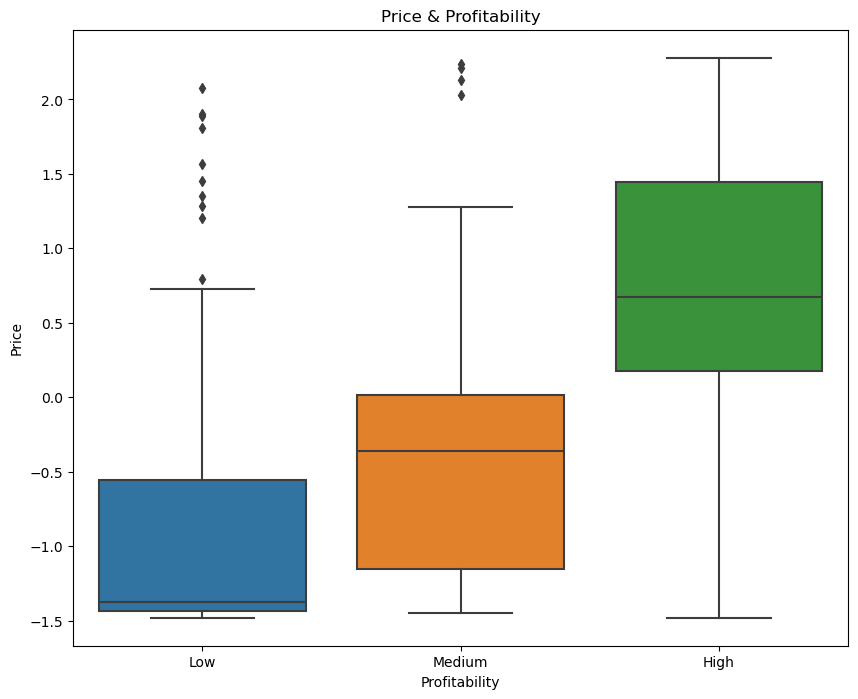

In [155]:
plt.figure(figsize=(10,8))
plt.title('Price & Profitability')
sns.boxplot(data=restoran, x='Profitability', y='Price')
plt.show()

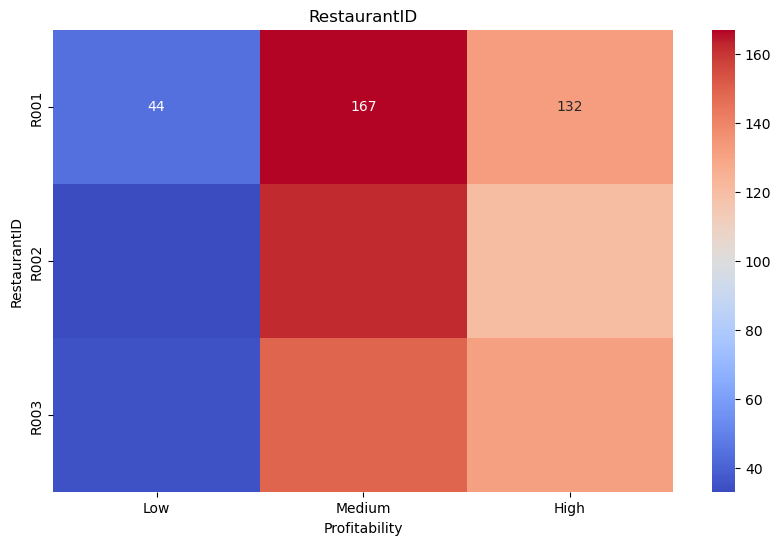

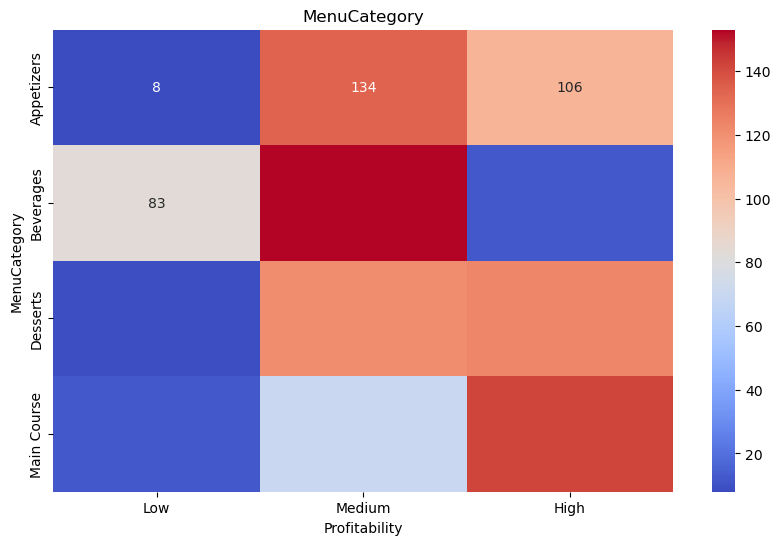

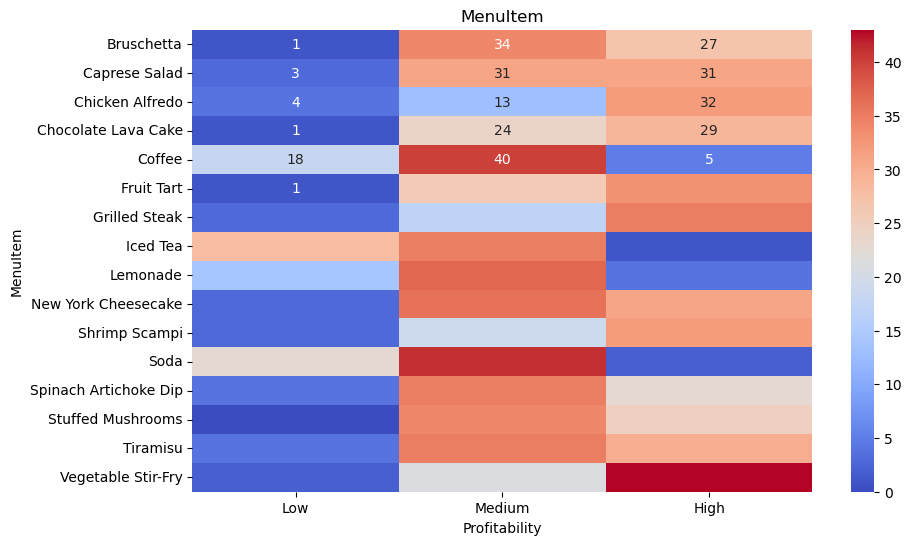

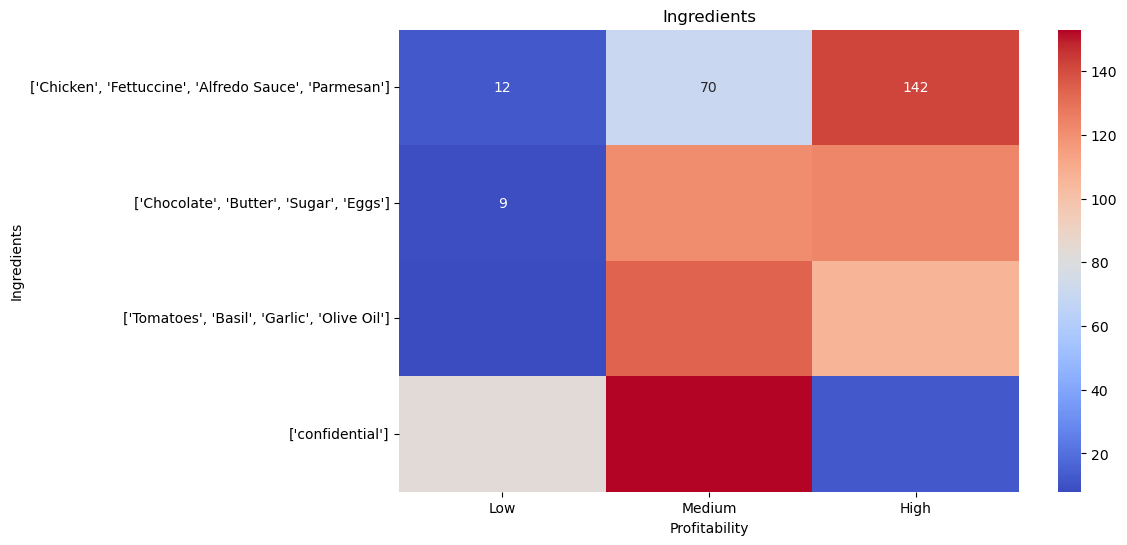

In [156]:
df_categ_cols = ['RestaurantID', 'MenuCategory', 'MenuItem', 'Ingredients']

for col in df_categ_cols:
    contgc_tbl = pd.crosstab(df[col], df['Profitability'])
    contgc_tbl = contgc_tbl.loc[:,['Low', 'Medium', 'High']]
    plt.figure(figsize=(10,6))
    plt.title(col)
    sns.heatmap(contgc_tbl, annot=True, cmap='coolwarm', fmt='d')
    plt.show()

In [157]:
df = pd.DataFrame(restoran)

In [158]:
df['Profitability Number'] = df['Profitability'].apply(lambda x: 0 if x == 'Low' else 1 if x == 'Medium' else 2)

df.head()


,RestaurantID,MenuCategory,MenuItem,Ingredients,Price,Profitability,Profitability Number
0,R003,Beverages,Soda,['confidential'],-1.407580,Low,0
1,R001,Appetizers,Spinach Artichoke Dip,"['Tomatoes', 'Basil', 'Garlic', 'Olive Oil']",-0.249458,Medium,1
2,R003,Desserts,New York Cheesecake,"['Chocolate', 'Butter', 'Sugar', 'Eggs']",0.769472,High,2
3,R003,Main Course,Chicken Alfredo,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",2.241110,High,2
4,R002,Main Course,Grilled Steak,"['Chicken', 'Fettuccine', 'Alfredo Sauce', 'Pa...",0.643795,Medium,1


In [159]:
features = ['MenuCategory', 'Price']

X = df[features]
y = df['Profitability Number']

X.head()

,MenuCategory,Price
0,Beverages,-1.407580
1,Appetizers,-0.249458
2,Desserts,0.769472
3,Main Course,2.241110
4,Main Course,0.643795


In [160]:
from sklearn.preprocessing import OrdinalEncoder
categ_cols = X.select_dtypes(include=['object']).columns

ordinal_encoder = OrdinalEncoder()

X[categ_cols] = ordinal_encoder.fit_transform(X[categ_cols])

C:\Users\rosyadaa\AppData\Local\Temp\ipykernel_44372\3420509339.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

X_train.shape, X_test.shape

((778, 2), (195, 2))

In [162]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Define the models to evaluate
models = [LogisticRegression, SVC, DecisionTreeClassifier]

for modelName in models:
    model = modelName(random_state=0)  # Initialize model with random_state for reproducibility
    model.fit(X_train, y_train)  # Fit the model on the training data
    cv_score = cross_val_score(model, X, y, cv=5)  # Compute cross-validation score
    
    print(f'{modelName.__name__}:')
    print(f'Accuracy score: {model.score(X_test, y_test)}')
    print(f'CV score: {cv_score.mean()}')


LogisticRegression:
Accuracy score: 0.8205128205128205
CV score: 0.7934232090933122
SVC:
Accuracy score: 0.8871794871794871
CV score: 0.8427544277028813
DecisionTreeClassifier:
Accuracy score: 0.9025641025641026
CV score: 0.8540840602696272


In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Example parameter grids
logreg_param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Logistic Regression
logreg = LogisticRegression()
logreg_grid_search = GridSearchCV(logreg, logreg_param_grid, cv=5, n_jobs=-1)
logreg_grid_search.fit(X_train, y_train)
logreg_best_model = logreg_grid_search.best_estimator_

# SVM
svm_model = SVC()
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, n_jobs=-1)
svm_grid_search.fit(X_train, y_train)
svm_best_model = svm_grid_search.best_estimator_

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_grid_search = GridSearchCV(tree_model, tree_param_grid, cv=5, n_jobs=-1)
tree_grid_search.fit(X_train, y_train)
tree_best_model = tree_grid_search.best_estimator_


In [164]:
# Logistic Regression Evaluation
logreg_predictions = logreg_best_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_predictions))

# KNN Evaluation
tree_predictions = tree_best_model.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, tree_predictions))
print("Decision Tree Accuracy:", accuracy_score(y_test, tree_predictions))

# SVM Evaluation
svm_predictions = svm_best_model.predict(X_test)
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        20
           1       0.82      0.92      0.87        95
           2       0.82      0.91      0.86        80

    accuracy                           0.82       195
   macro avg       0.55      0.61      0.58       195
weighted avg       0.74      0.82      0.78       195

Logistic Regression Accuracy: 0.8205128205128205
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        20
           1       0.97      0.98      0.97        95
           2       0.91      0.96      0.93        80

    accuracy                           0.92       195
   macro avg       0.86      0.81      0.83       195
weighted avg       0.92      0.92      0.92       195

Decision Tree Accuracy: 0.9230769230769231
SVM Classification Report:
              precision    recall  f1-s

c:\Users\rosyadaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\rosyadaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\rosyadaa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [165]:
# Cross-validation scores for each model
logreg_cv_scores = cross_val_score(logreg_best_model, X_train, y_train, cv=5)
tree_cv_scores = cross_val_score(tree_best_model, X_train, y_train, cv=5)
svm_cv_scores = cross_val_score(svm_best_model, X_train, y_train, cv=5)

print("Logistic Regression Cross-Validation Scores:", logreg_cv_scores)
print("Decision Tree Cross-Validation Scores:", tree_cv_scores)
print("SVM Cross-Validation Scores:", svm_cv_scores)

Logistic Regression Cross-Validation Scores: [0.82692308 0.80128205 0.78205128 0.78709677 0.75483871]
Decision Tree Cross-Validation Scores: [0.88461538 0.86538462 0.89102564 0.90967742 0.87096774]
SVM Cross-Validation Scores: [0.92948718 0.90384615 0.90384615 0.91612903 0.88387097]


In [166]:
# Ensure that you have trained your models
# Example models trained (assuming they have been previously fitted)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize and train models
logreg = LogisticRegression()
tree = DecisionTreeClassifier()
svm = SVC()

# Fit models on training data (assuming X_train and y_train are defined)
logreg.fit(X_train, y_train)
tree.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Make predictions
y_pred_logreg = logreg.predict(X_test)
y_pred_tree = tree.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Print predictions (optional)
print("Logistic Regression Predictions:", y_pred_logreg)
print("Decision Tree Predictions:", y_pred_tree)
print("SVM Predictions:", y_pred_svm)


Logistic Regression Predictions: [1 2 2 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 2 2 2 2 2 1 2 2 2 1 2 1 2 1 2 2
 2 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2 2 2 1 2 1 2 2 2 1 2 1 2 1 2 2 1 2 1 1 2 2
 1 1 1 2 1 1 1 2 1 2 1 2 2 1 1 2 2 2 1 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 1
 2 1 1 1 2 1 1 2 1 2 1 1 2 2 1 1 2 1 2 1 2 1 1 2 2 2 2 2 1 1 2 1 1 1 2 2 1
 2 1 2 2 2 1 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 1 1 1 2 2 2 1 2 1 2
 2 1 1 1 1 2 2 1 2 1]
Decision Tree Predictions: [1 1 2 2 0 2 1 2 2 1 1 1 0 1 2 2 1 2 1 1 1 1 2 1 2 2 1 2 2 0 1 2 0 2 2 2 2
 2 1 0 2 2 2 0 1 1 1 1 0 1 0 2 2 1 2 0 2 1 2 2 2 1 1 1 2 1 2 2 1 2 1 1 2 2
 1 1 1 2 1 1 1 2 1 2 1 2 2 1 2 1 2 2 1 2 1 2 1 0 2 1 1 1 1 1 1 1 1 0 1 2 2
 2 1 0 1 2 1 1 2 1 2 1 1 2 2 1 0 2 1 1 1 2 1 1 2 2 2 0 2 1 1 2 1 1 0 1 2 0
 2 1 2 2 2 1 2 2 1 0 1 1 2 2 1 2 1 1 1 0 1 1 2 1 1 2 1 1 1 1 2 2 2 1 2 1 2
 2 2 1 1 1 2 2 1 2 1]
SVM Predictions: [1 2 2 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 1 1 1 2 1 2 2 1 2 2 2 1 2 1 2 2 2 2
 2 1 1 2 2 2 2 1 1 1 1 1 1 1 2 2 1 2 1 2 1 2 2 2 1 1 1

In [167]:
import numpy as np
from sklearn import metrics

# Assuming y_test and y_pred are defined
mae_linreg = metrics.mean_absolute_error(y_test, y_pred_logreg)
mse_linreg = metrics.mean_squared_error(y_test, y_pred_logreg)
rmse_linreg = np.sqrt(mse_linreg)
r2_linreg = metrics.r2_score(y_test, y_pred_logreg)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae_linreg}')
print(f'Mean Squared Error (MSE): {mse_linreg}')
print(f'Root Mean Squared Error (RMSE): {rmse_linreg}')
print(f'R-squared (R2): {r2_linreg}')


Mean Absolute Error (MAE): 0.2205128205128205
Mean Squared Error (MSE): 0.30256410256410254
Root Mean Squared Error (RMSE): 0.5500582719713454
R-squared (R2): 0.2764150943396224


In [168]:
import numpy as np
from sklearn import metrics

# Assuming y_test and y_pred are defined
mae_tree = metrics.mean_absolute_error(y_test, y_pred_tree)
mse_tree = metrics.mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = metrics.r2_score(y_test, y_pred_tree)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae_tree}')
print(f'Mean Squared Error (MSE): {mse_tree}')
print(f'Root Mean Squared Error (RMSE): {rmse_tree}')
print(f'R-squared (R2): {r2_tree}')

Mean Absolute Error (MAE): 0.15897435897435896
Mean Squared Error (MSE): 0.28205128205128205
Root Mean Squared Error (RMSE): 0.5310850045437944
R-squared (R2): 0.3254716981132074


In [169]:
import numpy as np
from sklearn import metrics

# Assuming y_test and y_pred are defined
mae_svm = metrics.mean_absolute_error(y_test, y_pred_svm)
mse_svm = metrics.mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = metrics.r2_score(y_test, y_pred_svm)

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae_svm}')
print(f'Mean Squared Error (MSE): {mse_svm}')
print(f'Root Mean Squared Error (RMSE): {rmse_svm}')
print(f'R-squared (R2): {r2_svm}')

Mean Absolute Error (MAE): 0.15384615384615385
Mean Squared Error (MSE): 0.2358974358974359
Root Mean Squared Error (RMSE): 0.48569273815596203
R-squared (R2): 0.4358490566037735
